# Updating Regional Timeseries for OISST Data


# Objective 1: Updating Regional Timeseries

Update the already complete timeseries for each region with the new data that accumulates over the year.


In [1]:
import pyproj
pyproj.show_versions()

pyproj info:
    pyproj: 3.3.0
      PROJ: 8.2.1
  data dir: /Users/akemberling/opt/anaconda3/envs/py3oisst/share/proj
user_data_dir: /Users/akemberling/Library/Application Support/proj
PROJ DATA (recommended version): 1.8
PROJ Database: 1.2
EPSG Database: v10.041 [2021-12-03]
ESRI Database: ArcMap 12.8 [2021-05-06]
IGNF Database: 3.1.0 [2019-05-24]

System:
    python: 3.8.12 | packaged by conda-forge | (default, Jan 30 2022, 23:36:06)  [Clang 11.1.0 ]
executable: /Users/akemberling/opt/anaconda3/envs/py3oisst/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python deps:
   certifi: 2021.10.08
       pip: 22.0.3
setuptools: 60.9.3
    Cython: None


/Users/akemberling/opt/anaconda3/envs/py3oisst/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
# Load Packages
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import regionmask
import oisstools as ot
from datetime import date

# Set the workspace - local/ docker
box_root = ot.set_workspace("local")

# variable name to mask and make timeline from
var_name = "sst"

print(f"Working via directory: {box_root}")

Working via directory: /Users/akemberling/Library/CloudStorage/Box-Box/


## Set the Update Period

In [3]:
# start and end years for the update
start_yr = 2022
end_yr   = 2022

print(f"Updating Regional Timeseries for: {start_yr} - {end_yr}")

Updating Regional Timeseries for: 2022 - 2022


## Use oisstools to update collection

In [4]:
# Northeast Marine Regions
ot.update_regional_timeseries_collection(start_yr = start_yr, end_yr = end_yr, region_collection = "nelme_regions", box_root = box_root)

Updating Timeseries for: nelme_regions
Updating Timeseries for:
 - GoM
 - NELME
 - SNEandMAB


CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [4]:
# GMRI Focal Areas
ot.update_regional_timeseries_collection(start_yr = start_yr, end_yr = end_yr, region_collection = "gmri_sst_focal_areas", box_root = box_root)

Updating Timeseries for: gmri_sst_focal_areas
Updating Timeseries for:
 - apershing_gulf_of_maine
 - cpr_gulf_of_maine
 - aak_northwest_atlantic
 - long_island_sound


In [6]:
# NMFS Trawl Regions
ot.update_regional_timeseries_collection(start_yr = start_yr, end_yr = end_yr, region_collection = "nmfs_trawl_regions", box_root = box_root)

Updating Timeseries for: nmfs_trawl_regions
Updating Timeseries for:
 - georges_bank
 - gulf_of_maine
 - southern_new_england
 - mid_atlantic_bight
 - inuse_strata
 - regions_collection


In [7]:
# Gulf of Maine Physio Regions
ot.update_regional_timeseries_collection(start_yr = start_yr, end_yr = end_yr, region_collection = "gom_physio_regions", box_root = box_root)

Updating Timeseries for: gom_physio_regions
Updating Timeseries for:
 - bay_of_fundy
 - bear_seamount
 - browns_bank
 - central_gulf_of_maine
 - continental_slope
 - eastern_coastal_shelf
 - georges_bank
 - georges_basin
 - jordan_basin
 - kelvin_seamount
 - manning_seamount
 - northern_coastal_shelf
 - scotian_coastal_shelf
 - scotian_shelf
 - southern_coastal_shelf
 - wikinson_basin


In [8]:
# Large Marine Ecosystems
ot.update_regional_timeseries_collection(start_yr = start_yr, end_yr = end_yr, region_collection = "lme", box_root = box_root)

Updating Timeseries for: lme
Updating Timeseries for:
 - agulhas_current
 - aleutian_islands
 - antarctica
 - arabian_sea
 - baltic_sea
 - barents_sea
 - bay_of_bengal
 - beaufort_sea
 - benguela_current
 - black_sea
 - california_current
 - canadian_eastern_arctic_west_greenland
 - canadian_high_arctic_north_greenland
 - canary_current
 - caribbean_sea
 - celtic_biscay_shelf
 - central_arctic
 - east_bering_sea
 - east_brazil_shelf
 - east_central_australian_shelf
 - east_china_sea
 - east_siberian_sea
 - faroe_plateau
 - greenland_sea
 - guinea_current
 - gulf_of_alaska
 - gulf_of_california
 - gulf_of_mexico
 - gulf_of_thailand
 - hudson_bay_complex
 - humboldt_current
 - iberian_coastal
 - iceland_shelf_and_sea
 - indonesian_sea
 - insular_pacific_hawaiian
 - kara_sea
 - kuroshio_current
 - labrador_newfoundland
 - laptev_sea
 - mediterranean_sea
 - new_zealand_shelf
 - north_australian_shelf
 - north_brazil_shelf
 - north_sea
 - northeast_australian_shelf
 - northeast_us_continent

---

# Debugging oisstools.py function Following Manual Steps:

function: `ot.update_regional_timeseries_collection()`

## Select the Group of Regions to Update:

In [4]:
# Choose a set of regions to update (gmri_sst_focal_areas, lme, nmfs_trawl_regions)

# Option 1.
# update_regions = "gmri_sst_focal_areas"

# Option 2.
# update_regions = "lme"

# Option 3.
# update_regions = "nmfs_trawl_regions"

# Option 4.
update_regions = "nelme_regions"

# Option 5.
# update_regions = "gom_physio_regions"

print(f"Updating Timeseries for: {update_regions}")

Updating Timeseries for: nelme_regions


## Get all their names using lookup catalog

In [5]:
# Get their names from lookup catalog
region_names = ot.get_region_names(region_group = update_regions)
print("Updating Timeseries for:")
for region in region_names:
    print(f" - {region}")

Updating Timeseries for:
 - GoM
 - NELME
 - SNEandMAB


## Get shapefile details using lookup function

In [6]:
# Get paths to each shapefile
mask_paths = ot.get_timeseries_paths(box_root = box_root, 
                                     region_list = region_names, 
                                     region_group = update_regions, 
                                     polygons = True)
mask_paths[0]

'/Users/akemberling/Library/CloudStorage/Box-Box/RES_Data/Shapefiles/NELME_regions/GoM_sf.shp'

## Load Each Shapefile in the Collection

In [7]:
gpd.read_file(mask_paths[0])

,FID,geometry
0,0,"MULTIPOLYGON (((-69.94820 41.76470, -69.94790 ..."


In [ ]:
# Use paths to make list of loaded polygons
mask_list = []
for mask_path_i in mask_paths:
    mask_shape = gpd.read_file(mask_path_i)
    mask_list.append(mask_shape)
    print(f"Loading Mask Area :  {mask_path_i}")

## Load the desired update years of OISSTv2 data
 
Use the load_box_oisst function to get the temperature data off of box for the period within the the start and end years of the update.

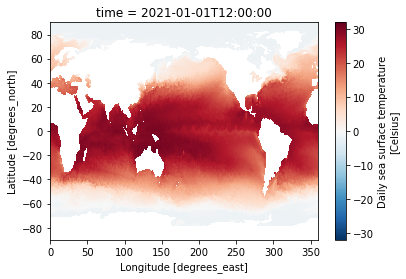

In [6]:
# # Load OISSt using ot.load_box_oisst()
# oisst_grid = ot.load_box_oisst(box_root, 
#                                start_yr, 
#                                end_yr, 
#                                anomalies = False, 
#                                do_parallel = True)
# oisst_grid.sst.isel(time = 0).plot()

## Calculate Temp-timeseries for Update-period

In [7]:
# # list to store the update period timeseries
# new_ts = []

# for mask_shp, mask_name in zip(mask_list, region_names):
#     print(f"Processing {mask_name}")
    
#     # Get masked timeseries
#     masked_ts = ot.calc_ts_mask(grid_obj = oisst_grid, 
#                                 shp_obj = mask_shp, 
#                                 shp_name = mask_name,
#                                 var_name = var_name)
    
#     # Add to list
#     new_ts.append(masked_ts)

Processing bay_of_fundy
Processing bear_seamount
Processing browns_bank
Processing central_gulf_of_maine
Processing continental_slope
Processing eastern_coastal_shelf
Processing georges_bank
Processing georges_basin
Processing jordan_basin
Processing kelvin_seamount
Processing manning_seamount
Processing northern_coastal_shelf
Processing scotian_coastal_shelf
Processing scotian_shelf
Processing southern_coastal_shelf
Processing wikinson_basin


# Load existing LME timeseries to Update

Because these timelines have already been run for most years and only need an update, we can load the corresponding timelines and append on the new information.


### Get timeseries details using lookup function

In [8]:
# # Get paths to each existing timeseries
# mask_ts_paths = ot.get_timeseries_paths(box_root = box_root, 
#                                         region_list = region_names, 
#                                         region_group = update_regions, 
#                                         polygons = False)


# # Open existing time series to update them
# ts_list = []
# for mask_ts_path in mask_ts_paths:
#     mask_ts = pd.read_csv(mask_ts_path)
#     ts_list.append(mask_ts)
#     print(f"Loading Timeseries : {mask_ts_path}")
    

Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_bay_of_fundy.csv
Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_bear_seamount.csv
Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_browns_bank.csv
Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_central_gulf_of_maine.csv
Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_continental_slope.csv
Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_eastern_coastal_shelf.csv
Loading Timeseries : /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/re

# Append Updates to Existing Timeseries

Now that the update period has been processed we can append it onto what we already have to get a complete time series for SST.

In [9]:
# # Step 4. match updates to existing timelines
# complete_ts = []
# for update_ts, old_ts in zip(new_ts, ts_list):
#     # Append without overlap
#     appended_ts = ot.append_sst_ts(old_ts = old_ts, update_ts = update_ts)
#     complete_ts.append(appended_ts)

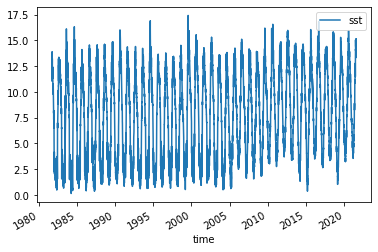

In [10]:
# # Plot the first on to check
# complete_ts[0].plot("time", "sst")

# Use Regional Climatology to Get Anomalies

We have tables with dates and temperature, and we have matching tables that contain the climate average for each day of year. Now we just need to pull that distinct information from the climatology, and join back using MOD.

In [11]:
# # Step 4. match updates to existing timelines
# anomaly_timeseries = []
# for clim_ts, update_ts in zip(ts_list, complete_ts):
#     # Append without overlap
#     anomaly_ts = ot.rejoin_climatology(old_ts = clim_ts, new_ts = update_ts)
#     anomaly_timeseries.append(anomaly_ts)

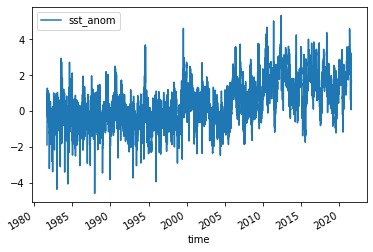

In [12]:
# # See if Anomalies look fine
# check_number = 0
# anomaly_timeseries[check_number].plot("time", "sst_anom")

# Saving Updates

Once the timeseries have been checked they just need to be saved out again.

In [13]:
# # Use the file paths we looked up before to set the save destinations
# for updated_timeline_i, update_path_i in zip(anomaly_timeseries, mask_ts_paths):
#     # save them
#     print(f"Saving: {update_path_i}")
#     updated_timeline_i.to_csv(update_path_i, index = False)

Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_bay_of_fundy.csv
Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_bear_seamount.csv
Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_browns_bank.csv
Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_central_gulf_of_maine.csv
Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_continental_slope.csv
Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_eastern_coastal_shelf.csv
Saving: /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/regional_timeseries/GulfOfMainePhysioRegions/OISSTv2_anom_georges_bank.csv
Saving: /Users/ake